In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# testing code source
import sys
sys.path.append("..")

In [3]:
import atlas_rbm.atlas as atlas
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

In [4]:
model1 = atlas.construct_model_from_metabolic_network('../docs/networks/metabolic_network4_arabinose.tsv', verbose = False)
model2 = atlas.construct_model_from_interaction_network('../docs/networks/ProtProt+ProtMet_network1.tsv', verbose = False)

In [5]:
atlas.combine_models(model1, model2, verbose = False)

<Model 'atlas_rbm.construct_model_from_interaction_network' (monomers: 2, rules: 36, parameters: 154, expressions: 0, compartments: 0) at 0x7f295bb17f28>

In [6]:
# model initial condition
simulation.set_initial.met(model2, 'ATP', 'cyt', 100)
simulation.set_initial.met(model2, 'PROTON', 'per', 100)
simulation.set_initial.met(model2, 'WATER', 'cyt', 100)
simulation.set_initial.met(model2, 'alpha_L_arabinopyranose', 'per', 100)

simulation.set_initial.prot(model2, 'araA', 'cyt', 1)
simulation.set_initial.prot(model2, 'araB', 'cyt', 1)
simulation.set_initial.prot(model2, 'araC', 'cyt', 1)
simulation.set_initial.prot(model2, 'araD', 'cyt', 1)
simulation.set_initial.prot(model2, 'araE', 'cyt', 1)
simulation.set_initial.prot(model2, 'araF', 'cyt', 1)
simulation.set_initial.prot(model2, 'araG', 'cyt', 2)
simulation.set_initial.prot(model2, 'araH', 'cyt', 2)

<Model 'atlas_rbm.construct_model_from_interaction_network' (monomers: 2, rules: 36, parameters: 154, expressions: 0, compartments: 0) at 0x7f295bb17f28>

In [7]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
# export.to_bngl(model2, 'test.bngl', bng)
export.to_kappa(model2, 'test.kappa')

In [14]:
# data1 = simulation.ode(model2, start = 0, finish = 10, points = 200, path = bng)
# data2 = simulation.ssa(model2, start = 0, finish = 10, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model2, start = 0, finish = 50, points = 1000, n_runs = 20, path = kasim)

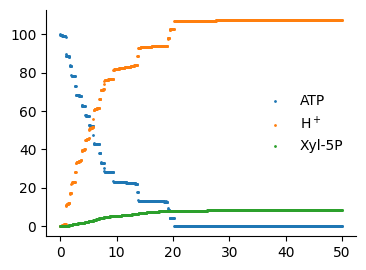

In [15]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data3['avrg'], 'ATP', 'cyt', **{'kind' : 'plot'}, plt_kws = {'s' : 1, 'label' : r'ATP'})
simulation.plot.metabolite(data3['avrg'], 'PROTON', 'cyt', **{'kind' : 'plot'}, plt_kws = {'s' : 1, 'label' : r'H$^+$'})
simulation.plot.metabolite(data3['avrg'], 'XYLULOSE-5-PHOSPHATE', 'cyt', **{'kind' : 'plot'}, plt_kws = {'s' : 1, 'label' : r'Xyl-5P'})

seaborn.despine()

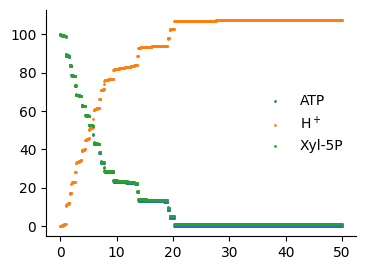

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data3['avrg'], 'ATP', 'cyt', **{'kind' : 'plot'}, plt_kws = {'s' : 1, 'label' : r'ATP'})
simulation.plot.metabolite(data3['avrg'], 'PROTON', 'cyt', **{'kind' : 'plot'}, plt_kws = {'s' : 1, 'label' : r'H$^+$'})
simulation.plot.metabolite(data3['avrg'], 'alpha_L_arabinopyranose', 'per', **{'kind' : 'plot'}, plt_kws = {'s' : 1, 'label' : r'Xyl-5P'})

seaborn.despine()